Using TensorFlow backend.


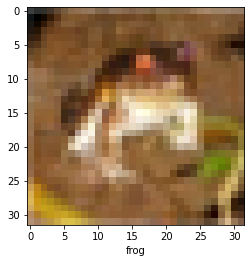

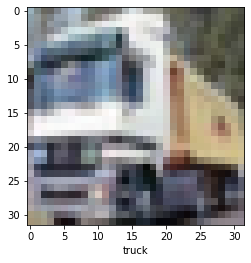

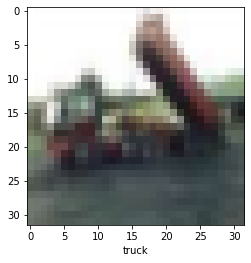

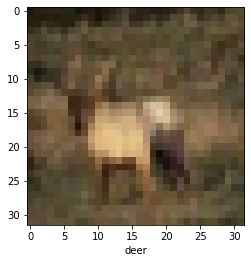

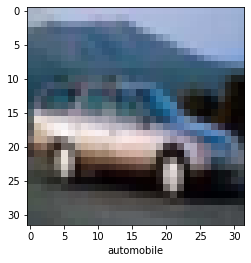

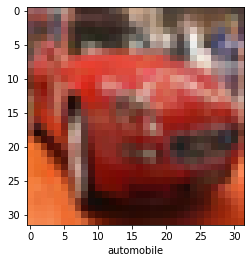

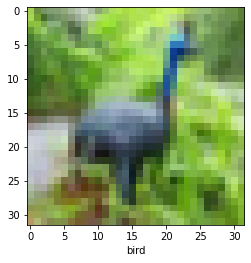

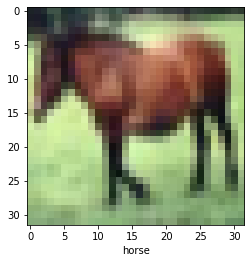

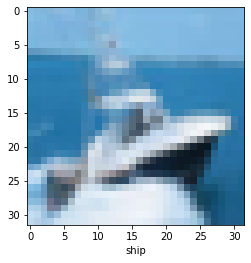

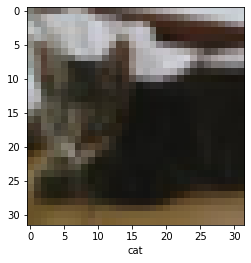

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 142s 3ms/step - loss: 1.6601 - accuracy: 0.4023 - val_loss: 1.2872 - val_accuracy: 0.5480

Epoch 00001: val_loss improved from inf to 1.28716, saving model to ./model/01-1.2872.hdf5
Epoch 2/30
50000/50000 [==============================] - 148s 3ms/step - loss: 1.3133 - accuracy: 0.5338 - val_loss: 1.0924 - val_accuracy: 0.6218

Epoch 00002: val_loss improved from 1.28716 to 1.09235, saving model to ./model/02-1.0924.hdf5
Epoch 3/30
50000/50000 [==============================] - 149s 3ms/step - loss: 1.1771 - accuracy: 0.5849 - val_loss: 1.0223 - val_accuracy: 0.6477

Epoch 00003: val_loss improved from 1.09235 to 1.02225, saving model to ./model/03-1.0223.hdf5
Epoch 4/30
50000/50000 [==============================] - 157s 3ms/step - loss: 1.0867 - accuracy: 0.6140 - val_loss: 0.9843 - val_accuracy: 0.6547

Epoch 00004: val_loss improved from 1.02225 to 0.98426, saving model to .

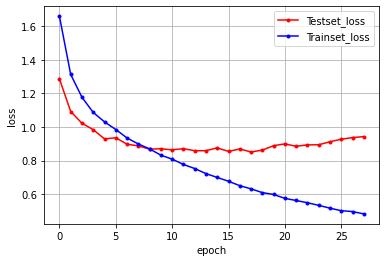

In [1]:

#-*- coding: utf-8 -*-

from keras.datasets import cifar10
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint,EarlyStopping

import matplotlib.pyplot as plt
import numpy
import os
import tensorflow as tf

# seed 값 설정
seed = 0
numpy.random.seed(seed)
tf.random.set_seed(3)

# 데이터 불러오기

(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

for i in range(10):
    plt.imshow(X_train[i])
    plt.xlabel(class_names[Y_train[i][0]])
    plt.show()
    
X_train = X_train.reshape(X_train.shape[0], 32, 32, 3).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 32, 32, 3).astype('float32') / 255
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)
    
# 컨볼루션 신경망의 설정
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,  activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# 모델 최적화 설정
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

# 모델의 실행
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30, batch_size=200, verbose=1, callbacks=[early_stopping_callback,checkpointer])

# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

# 테스트 셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

# 그래프로 표현
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()


In [3]:
import numpy as np

Y_prediction = model.predict(X_test)


for i in range(10):
    prediction = Y_prediction[i]
    
    n = np.argmax(prediction)
    label = np.argmax(Y_test[i])
    
    print('Actual Class: ' + str(label) + ' => Expect class: ' + str(n))


Actual Class: 3 => Expect class: 3
Actual Class: 8 => Expect class: 1
Actual Class: 8 => Expect class: 8
Actual Class: 0 => Expect class: 0
Actual Class: 6 => Expect class: 6
Actual Class: 6 => Expect class: 6
Actual Class: 1 => Expect class: 1
Actual Class: 6 => Expect class: 6
Actual Class: 3 => Expect class: 3
Actual Class: 1 => Expect class: 1


In [ ]:
from keras.models import load_model


#-*- coding: utf-8 -*-

from keras.datasets import cifar10
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint,EarlyStopping

import matplotlib.pyplot as plt
import numpy
import os
import tensorflow as tf

# seed 값 설정
seed = 0
numpy.random.seed(seed)
tf.random.set_seed(3)

# 데이터 불러오기

(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

for i in range(10):
    plt.imshow(X_train[i])
    plt.xlabel(class_names[Y_train[i][0]])
    plt.show()
    
X_train = X_train.reshape(X_train.shape[0], 32, 32, 3).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 32, 32, 3).astype('float32') / 255
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)

model = load_model('./model/18-0.8623.hdf5')

import numpy as np

Y_prediction = model.predict(X_test)


for i in range(10):
    prediction = Y_prediction[i]
    
    n = np.argmax(prediction)
    label = np.argmax(Y_test[i])
    
    print('Actual Class: ' + str(label) + ' => Expect class: ' + str(n))


In [ ]:

#-*- coding: utf-8 -*-

from keras.datasets import cifar10
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint,EarlyStopping

import matplotlib.pyplot as plt
import numpy
import os
import tensorflow as tf
from keras.models import load_model


# seed 값 설정
seed = 0
numpy.random.seed(seed)
tf.random.set_seed(3)

# 데이터 불러오기

(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dogq5', 'frog', 'horse', 'ship', 'truck']

for i in range(10):
    plt.imshow(X_train[i])
    plt.xlabel(class_names[Y_train[i][0]])
    plt.show()

print(X_train.shape)

X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)


model = load_model('./model/18-0.8623.hdf5')

import numpy as np

Y_prediction = model.predict(X_test)


for i in range(10):
    prediction = Y_prediction[i]
    
    n = np.argmax(prediction)
    label = np.argmax(Y_test[i])
    
    print('Actual Class: ' + str(label) + ' => Expect class: ' + str(n))
